<a href="https://colab.research.google.com/github/UMARAMINCHOHAN/Machine-Learning-Assignment/blob/main/CNN_on_SDSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SAMINA MUSHTAQ CONTRIBUTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

# Define the batch size and image size
batch_size = 32
img_size = (64, 64)

# Load the training data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Group_Project_Data/Train',  # Path to the training data directory
    batch_size=batch_size,  # Number of images per batch
    image_size=img_size,  # Size of the images
    shuffle=True,  # Shuffle the data
    seed=42,  # Random seed for shuffling
    validation_split=0.5,  # Split off 20% of the data for validation
    subset='training',  # Use the training subset of the data
    label_mode='binary', # Classify the images as binary (real/fake)
    color_mode='grayscale' # Use grayscale images for faster training
)

# Load the validation data
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Group_Project_Data/Train',  # Path to the training data directory
    batch_size=batch_size,  # Number of images per batch
    image_size=img_size,  # Size of the images
    shuffle=True,  # Shuffle the data
    seed=42,  # Random seed for shuffling
    validation_split=0.5,  # Split off 20% of the data for validation
    subset='validation',  # Use the validation subset of the data
    label_mode='binary', # Classify the images as binary (real/fake)
    color_mode='grayscale' # Use grayscale images for faster training
)

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Group_Project_Data/Valid',  # Path to the test data directory
    batch_size=batch_size,  # Number of images per batch
    image_size=img_size,  # Size of the images
    shuffle=False,  # Don't shuffle the data
    label_mode='binary', # Classify the images as binary (real/fake)
    color_mode='grayscale' # Use grayscale images for faster training
)


Found 6000 files belonging to 2 classes.
Using 3000 files for training.
Found 6000 files belonging to 2 classes.
Using 3000 files for validation.
Found 2000 files belonging to 2 classes.


#KHUBAIB AHMAD CONTRIBUTION

In [ ]:
# Create the CNN model

model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(64, 64, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define early stopping based on validation loss
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
94/94 [==============================] - 930s 10s/step - loss: 0.5146 - accuracy: 0.7433 - val_loss: 0.0937 - val_accuracy: 0.9833
Epoch 2/10
94/94 [==============================] - 5s 53ms/step - loss: 0.0614 - accuracy: 0.9843 - val_loss: 0.0860 - val_accuracy: 0.9687
Epoch 3/10
94/94 [==============================] - 6s 61ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.0143 - val_accuracy: 0.9947
Epoch 4/10
94/94 [==============================] - 5s 54ms/step - loss: 0.0149 - accuracy: 0.9963 - val_loss: 0.0607 - val_accuracy: 0.9863
Epoch 5/10
94/94 [==============================] - 6s 67ms/step - loss: 0.0141 - accuracy: 0.9940 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 6/10
94/94 [==============================] - 5s 54ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0055 - val_accuracy: 0.9990
Epoch 7/10
94/94 [==============================] - 8s 83ms/step - loss: 0.0294 - accuracy: 0.9897 - val_loss: 0.0148 - val_accuracy: 0.9937
Epoch 8/10
9

In [ ]:
# Saving model

model.save('/content/drive/MyDrive/Machine Learning Assignment/Model/')

In [ ]:
# zip the model
!zip -r /content/drive/MyDrive/Machine Learning Assignment/Model.zip /content/drive/MyDrive/Machine Learning Assignment/Model/

	zip warning: name not matched: Learning
	zip warning: name not matched: Assignment/Model.zip
	zip warning: name not matched: /content/drive/MyDrive/Machine
	zip warning: name not matched: Learning
	zip warning: name not matched: Assignment/Model/

zip error: Nothing to do! (try: zip -r /content/drive/MyDrive/Machine . -i Learning Assignment/Model.zip /content/drive/MyDrive/Machine Learning Assignment/Model/)


#UMAR AMIN CHOHAN CONTRIBUTION

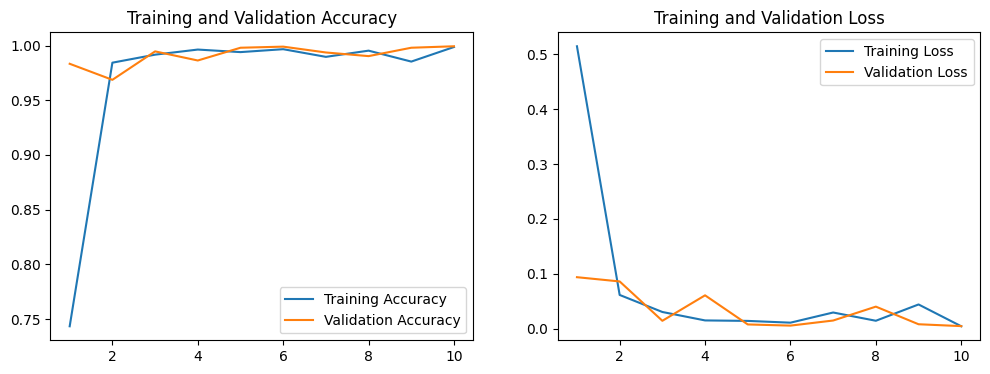

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 11)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

#SONA SHANAWAZ CONTRIBUTION

63/63 [==============================] - 528s 8s/step - loss: 0.0032 - accuracy: 0.9990


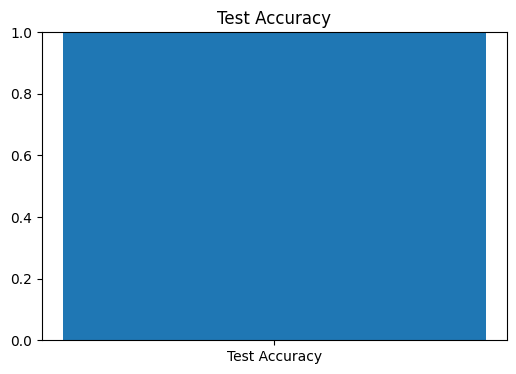

In [ ]:
# Evaluate the model on the test set and record the test accuracy
test_loss, test_accuracy = model.evaluate(test_data)

# Plot the test accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Test Accuracy'], [test_accuracy])
plt.ylim([0, 1])
plt.title('Test Accuracy')
plt.show()


In [ ]:
# Test saved model

loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Dataset/model/')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7